# Lecture 14: Simplified Self Attention

#### each row of the inputs tensor represents one word from the input sequence 
#### in the form of a 3-dimensional token embedding

In [345]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor([[0.43, 0.15, 0.89],
                       [0.55, 0.87, 0.66],
                       [0.57, 0.85, 0.64],
                       [0.22, 0.58, 0.33],
                       [0.77, 0.25, 0.10],
                       [0.05, 0.80, 0.55]]
                       )

### plotting endpoints of vectors

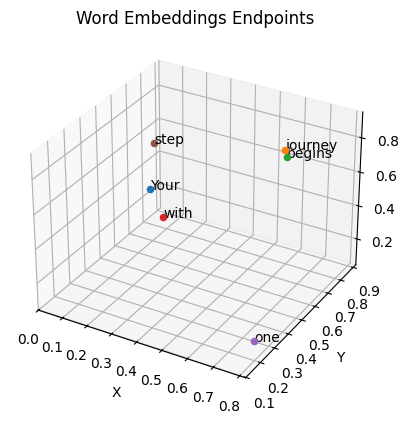

In [346]:
words = ["Your", "journey", "begins", "with", "one", "step"]

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.title("Word Embeddings Endpoints")
plt.show()

### plotting actual vectors from origin

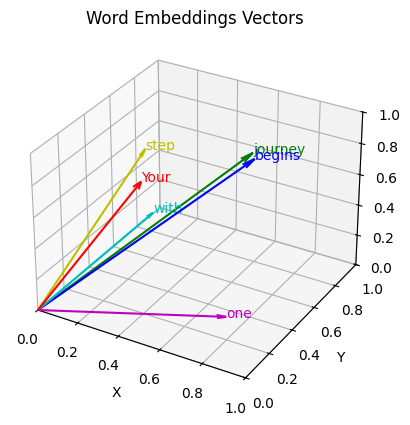

In [347]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = ["r", "g", "b", "c", "m", "y"]

for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title("Word Embeddings Vectors")
plt.show()

### example for creating attention scores for the second word in the sequence (journey)

In [348]:
query_journey = inputs[1]
query_journey

tensor([0.5500, 0.8700, 0.6600])

### initializing empty vector with number of dimensions corresponding to the context length.
### context length holds information about the amount of tokens in the sequence and each token in the 
### sequence should be assigned a value within the attention scores vector

## 1. Step --> Computing Attention Scores

In [349]:
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query_journey)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [350]:
my_query = inputs[1]
print(inputs, inputs.shape)
print(my_query, my_query.shape)
print(inputs[0], inputs[0].shape)
print(f"{inputs[5].size()} @ {my_query.size()} = {torch.dot(inputs[5], my_query).size()} 6 times 1x3 @ 1x3 --> 6 times 1x1")
print(f"{(inputs[0] @ my_query):.4f}, {torch.dot(inputs[0], my_query):.4f} --> 1st tensor element")
print(f"{(inputs[1] @ my_query):.4f}, {torch.dot(inputs[1], my_query):.4f} --> 2nd tensor element")
print(f"{(inputs[2] @ my_query):.4f}, {torch.dot(inputs[2], my_query):.4f} --> 3rd tensor element")
print(f"{(inputs[3] @ my_query):.4f}, {torch.dot(inputs[3], my_query):.4f} --> 4rd tensor element")
print(f"{(inputs[4] @ my_query):.4f}, {torch.dot(inputs[4], my_query):.4f} --> 5th tensor element")
print(f"{(inputs[5] @ my_query):.4f}, {torch.dot(inputs[5], my_query):.4f} --> 6th tensor element")
print(attn_scores_2)


tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]]) torch.Size([6, 3])
tensor([0.5500, 0.8700, 0.6600]) torch.Size([3])
tensor([0.4300, 0.1500, 0.8900]) torch.Size([3])
torch.Size([3]) @ torch.Size([3]) = torch.Size([]) 6 times 1x3 @ 1x3 --> 6 times 1x1
0.9544, 0.9544 --> 1st tensor element
1.4950, 1.4950 --> 2nd tensor element
1.4754, 1.4754 --> 3rd tensor element
0.8434, 0.8434 --> 4rd tensor element
0.7070, 0.7070 --> 5th tensor element
1.0865, 1.0865 --> 6th tensor element
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


### Attention Scores COMPLETE

In [351]:
print(inputs.shape, inputs.T.shape)
attn_scores = inputs @ inputs.T
attn_scores[1]

torch.Size([6, 3]) torch.Size([3, 6])


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

#### Dimensions: 6 dot products between Vector 1 X 3 and vector 1 X 3

#### each element of the attention scores vector is a dot product between the query vector and the remaining token embedding vectors from the sequence
#### taking the second word in the sequence as an example, the calculated tensor holds information about 
#### how much attention should be paid from the second word (query) to the first and all the remaining words

## 2.1 Step --> Normalization

### turn attention scores into attention weights 
#### --> attention scores already hold values that indicate which token should be paid most attention to 
#### --> attention weights however enable to tell by percentage values

In [352]:
attn_weights_2 = attn_scores_2 / sum(attn_scores_2)

print(f"Attention Scores: {attn_scores_2}")
print(f"Sum of Attention Scores: {attn_scores_2.sum()}")
print(f"Attention Weights: {attn_weights_2}")
print(f"Sum of Attention Weights: {attn_weights_2.sum()}")

Attention Scores: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Sum of Attention Scores: 6.561699867248535
Attention Weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of Attention Weights: 1.0


### enables to make optimal interpretations on how much importance should be paid to the tokens in the input sequence from the respective query token

### aiming to make the attention scores sum up to one which enables to express the values as percentages
### it also ensures improved training stability

## 2.2 Step: Using Softmax for normalization

#### 2.2.1 implementing naive softmax 

Dimension 0 dim=0 can be added to the .sum Function --> .sum(dim=0)

In [353]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum()

attn_weights_2_naive = softmax_naive(attn_scores_2)
print(f"Attention Weights without using Softmax: {attn_weights_2}")
print(attn_weights_2.sum())
print(f"Attention Weights using the naive Softmax: {attn_weights_2_naive}")
print(attn_weights_2_naive.sum())

Attention Weights without using Softmax: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.)
Attention Weights using the naive Softmax: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


#### 2.2.2 PyTorch implementation of Softmax

In [354]:
attn_weights_2_softmax = torch.softmax(attn_scores_2, dim=0)
print(f"Attention Weights using PyTorch built in Softmax Function: {attn_weights_2_softmax}")
print(attn_weights_2_softmax.sum())

Attention Weights using PyTorch built in Softmax Function: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


### Attention Weights COMPLETE

In [355]:
print(attn_scores.shape)
attn_weights = torch.softmax(attn_scores, dim=1)
attn_weights

torch.Size([6, 6])


tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

## 3. Step: Computing the Context Vector

In [356]:
query_2 = inputs[1]
print(f"Initial Vector Embedding: {query_2}")

context_vec_2 = torch.zeros(query_2.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2_softmax[i]*x_i
print(f"Context Vector Embedding: {context_vec_2}")

Initial Vector Embedding: tensor([0.5500, 0.8700, 0.6600])
Context Vector Embedding: tensor([0.4419, 0.6515, 0.5683])


#### step by step calculation of context vector

#### each element in each row of the 6X6 Attention Weights Matrix is multiplied with the respective row of the input embeddings

#### 1st value of the 1st row from the Attention Weights * 1st Inputs row
#### 2nd value of the 1st row from the Attention Weights * 2nd Inputs row
#### the number Dimensions in the Attention Weights Vectors depends on the number of words in the sequence

#### for this example 6 attention weights are multiplied with 6 vector embeddings resulting in 6 vectors which are added up
#### resulting in the 1st of 6 Vectors from the Context Matrix

In [357]:
vec_0 = attn_weights[0][0] * inputs[0]
vec_1 = attn_weights[0][1] * inputs[1]
vec_2 = attn_weights[0][2] * inputs[2]
vec_3 = attn_weights[0][3] * inputs[3]
vec_4 = attn_weights[0][4] * inputs[4]
vec_5 = attn_weights[0][5] * inputs[5]
print(attn_weights[0][0].shape, inputs[0].shape, vec_0.shape)
context_vec_0 = vec_0 + vec_1 + vec_2 + vec_3 + vec_4 + vec_5
print(f"First Vector from the Context Matrix: {context_vec_0}")

torch.Size([]) torch.Size([3]) torch.Size([3])
First Vector from the Context Matrix: tensor([0.4421, 0.5931, 0.5790])


### Context Vectors COMPLETE

In [358]:
context_vec = attn_weights @ inputs
print(attn_weights.shape, inputs.shape)
print(context_vec)


torch.Size([6, 6]) torch.Size([6, 3])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [359]:
inputs1 = torch.tensor([[0.43, 0.15, 0.89],
                       [0.55, 0.87, 0.66],
                       [0.57, 0.85, 0.64],
                       [0.22, 0.58, 0.33],
                       [0.77, 0.25, 0.10],
                       [0.05, 0.80, 0.55],
                       [0.4419, 0.6515, 0.5683]]
                       )

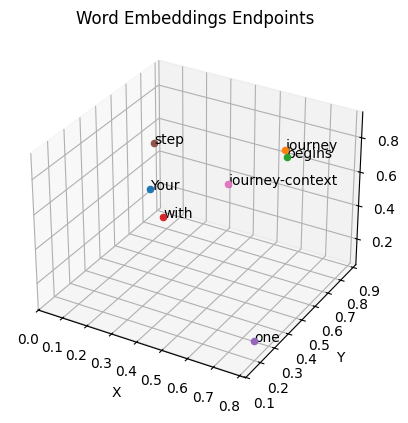

In [360]:
words = ["Your", "journey", "begins", "with", "one", "step", "journey-context"]

x_coords = inputs1[:, 0].numpy()
y_coords = inputs1[:, 1].numpy()
z_coords = inputs1[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.title("Word Embeddings Endpoints")
plt.show()

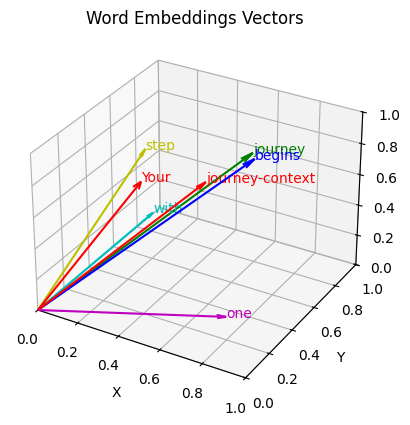

In [361]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = ["r", "g", "b", "c", "m", "y", "r"]

for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title("Word Embeddings Vectors")
plt.show()

### Conventional method of getting Attention Scores

In [362]:
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

### Efficient way to compute the Attention Scores

In [363]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

### Applying Softmax to normalize along the ROWS

#### using dim=-1 normalizes alonge the rows

In [364]:
attn_weights = torch.softmax(attn_scores, dim=-1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [365]:
print(attn_weights[0].sum())

tensor(1.0000)


#### using dim=0 normalizes along the columns

In [366]:
test = torch.softmax(attn_scores, dim=0)
test

tensor([[0.2098, 0.1385, 0.1390, 0.1435, 0.1526, 0.1385],
        [0.2006, 0.2379, 0.2369, 0.2074, 0.1958, 0.2184],
        [0.1981, 0.2333, 0.2326, 0.2046, 0.1975, 0.2128],
        [0.1242, 0.1240, 0.1242, 0.1462, 0.1367, 0.1420],
        [0.1220, 0.1082, 0.1108, 0.1263, 0.1879, 0.0988],
        [0.1452, 0.1581, 0.1565, 0.1720, 0.1295, 0.1896]])

In [367]:
print(test.T[0].sum())

tensor(1.0000)


In [368]:
context_vec = attn_weights @ inputs  
context_vec

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])